In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the datasets
country = pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country.shape

(167, 10)

In [5]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


*The dataset does not contain any missing values*

In [7]:
country.country.value_counts()

Germany                           1
Albania                           1
Tajikistan                        1
Luxembourg                        1
St. Vincent and the Grenadines    1
                                 ..
Angola                            1
Guatemala                         1
Italy                             1
Antigua and Barbuda               1
Turkmenistan                      1
Name: country, Length: 167, dtype: int64

*There are 167 countries present in the dataset*

In [8]:
#Since the coulmns such as exports, health, imports contains values in percentage of gdpp we need to convert it
country['exports'] = (country.exports*country.gdpp)/100
country['health'] = (country.health*country.gdpp)/100
country['imports'] = (country.imports*country.gdpp)/100

In [9]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### EDA

In [10]:
#Excluding the categorical column from the dataset
count_num = country.select_dtypes(exclude='object').columns

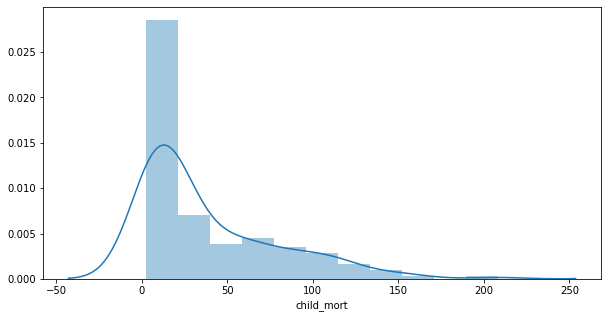

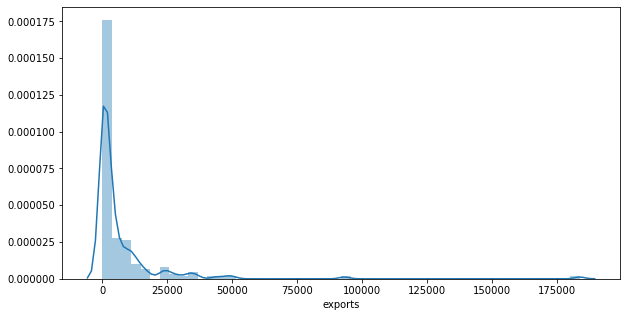

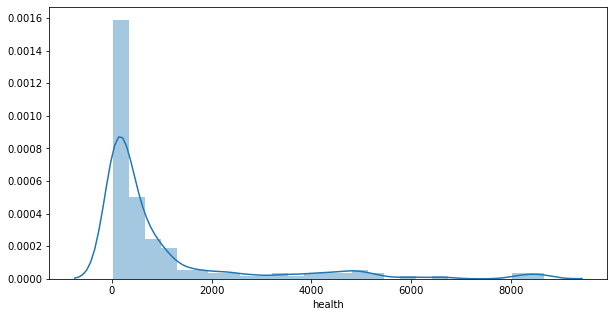

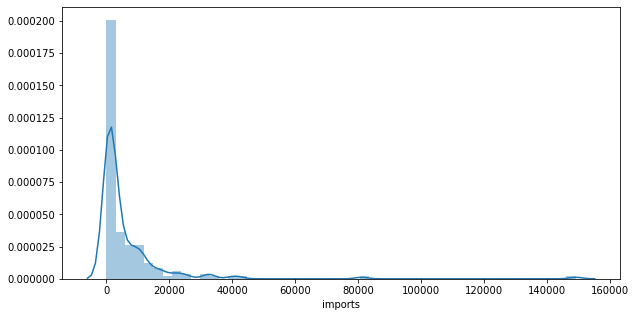

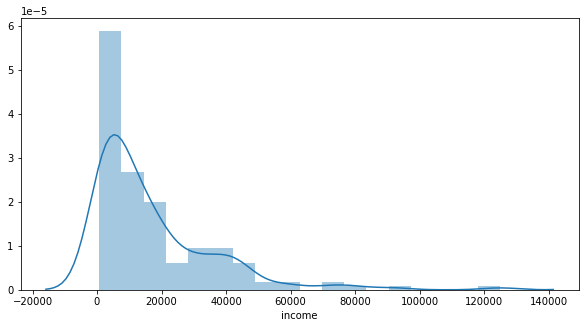

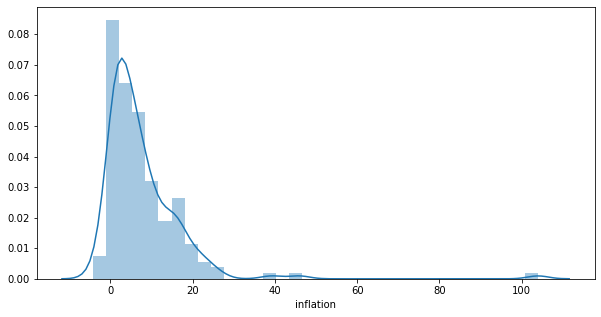

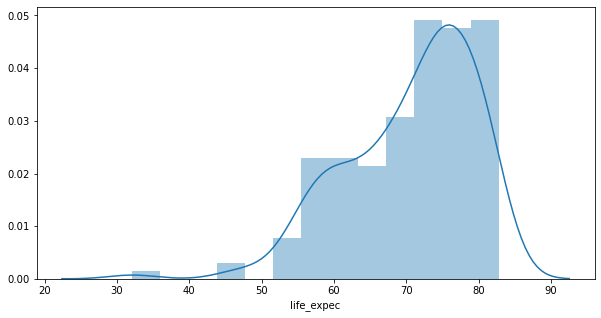

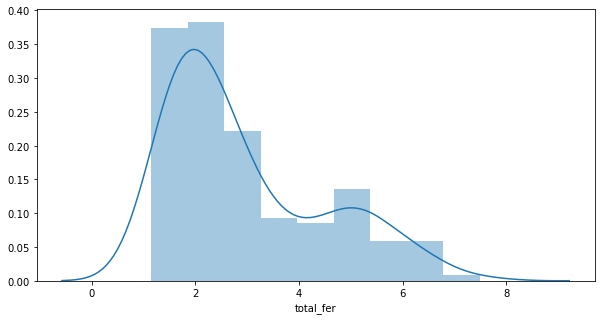

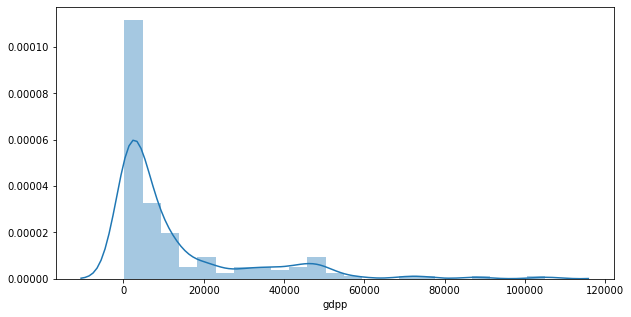

In [11]:
#Finding the data distribution in each columns
for i in count_num:
    plt.figure(figsize=(10,5))
    sns.distplot(country[i])
    plt.show()

**From the business problem we come to know that countries having 'high child_mort' and 'high total_fer' represents
the backward countries**

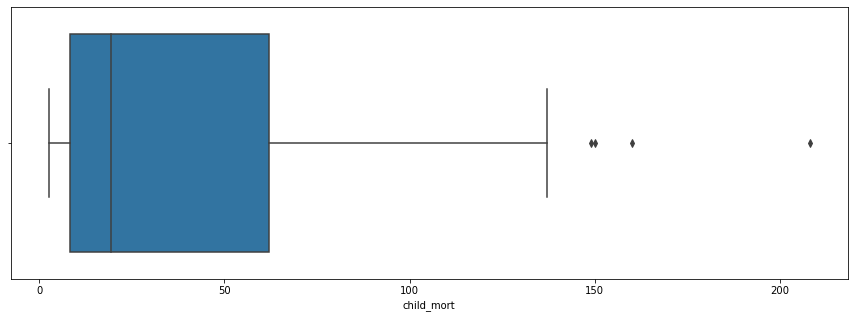

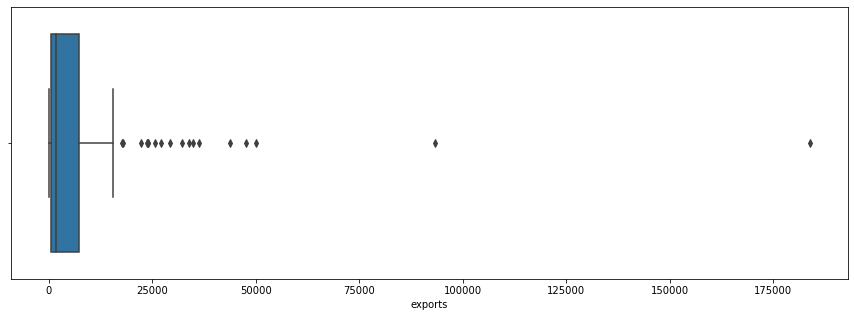

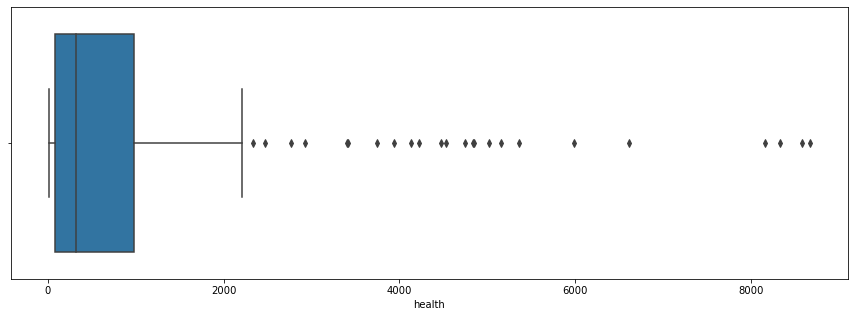

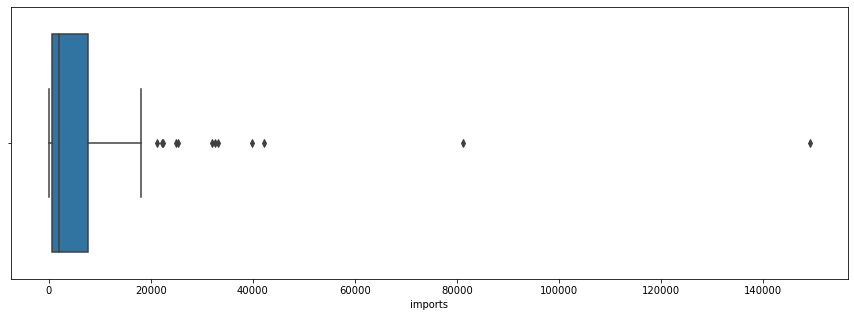

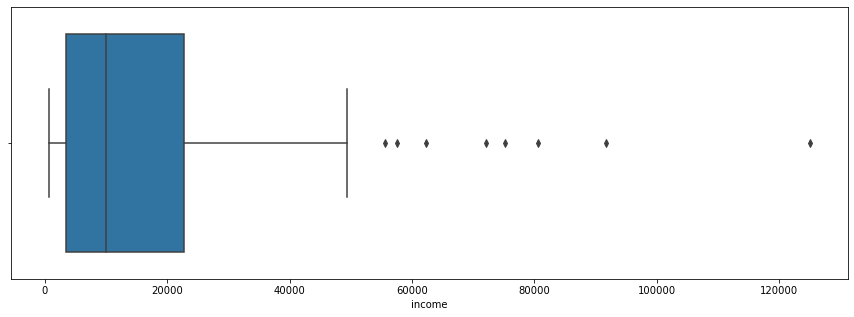

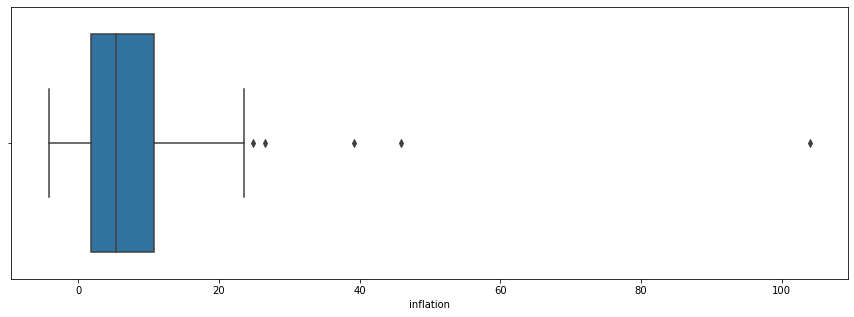

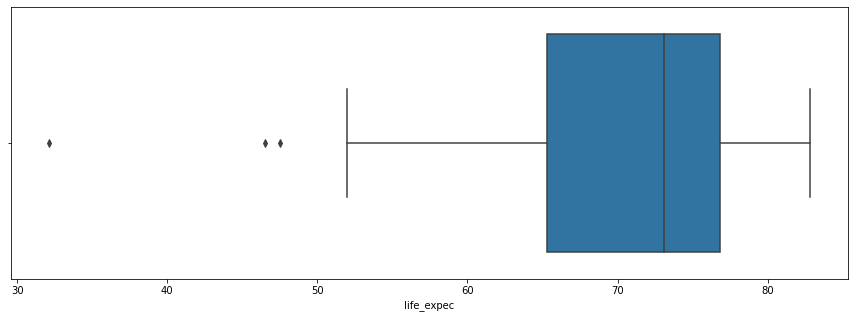

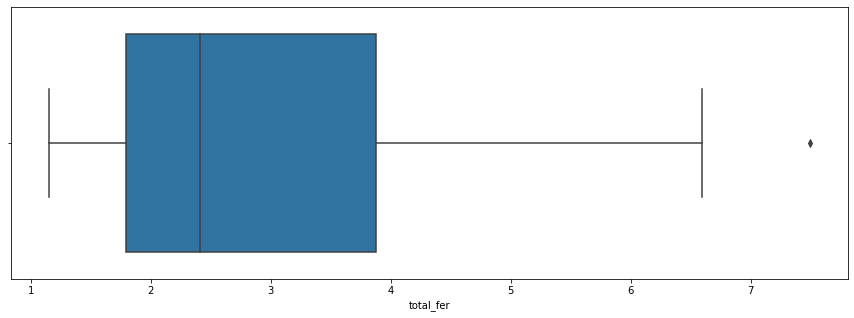

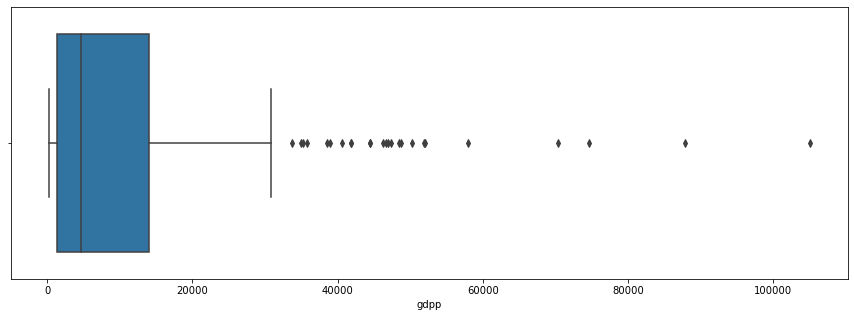

In [12]:
##Plotting a bar plot to know the outliers
for i in count_num:
    plt.figure(figsize=(15,5))
    sns.boxplot(country[i])
    plt.show()

# Bivariate Analysis

*Bivariate analysis for numerical columns can be done through pairplot*

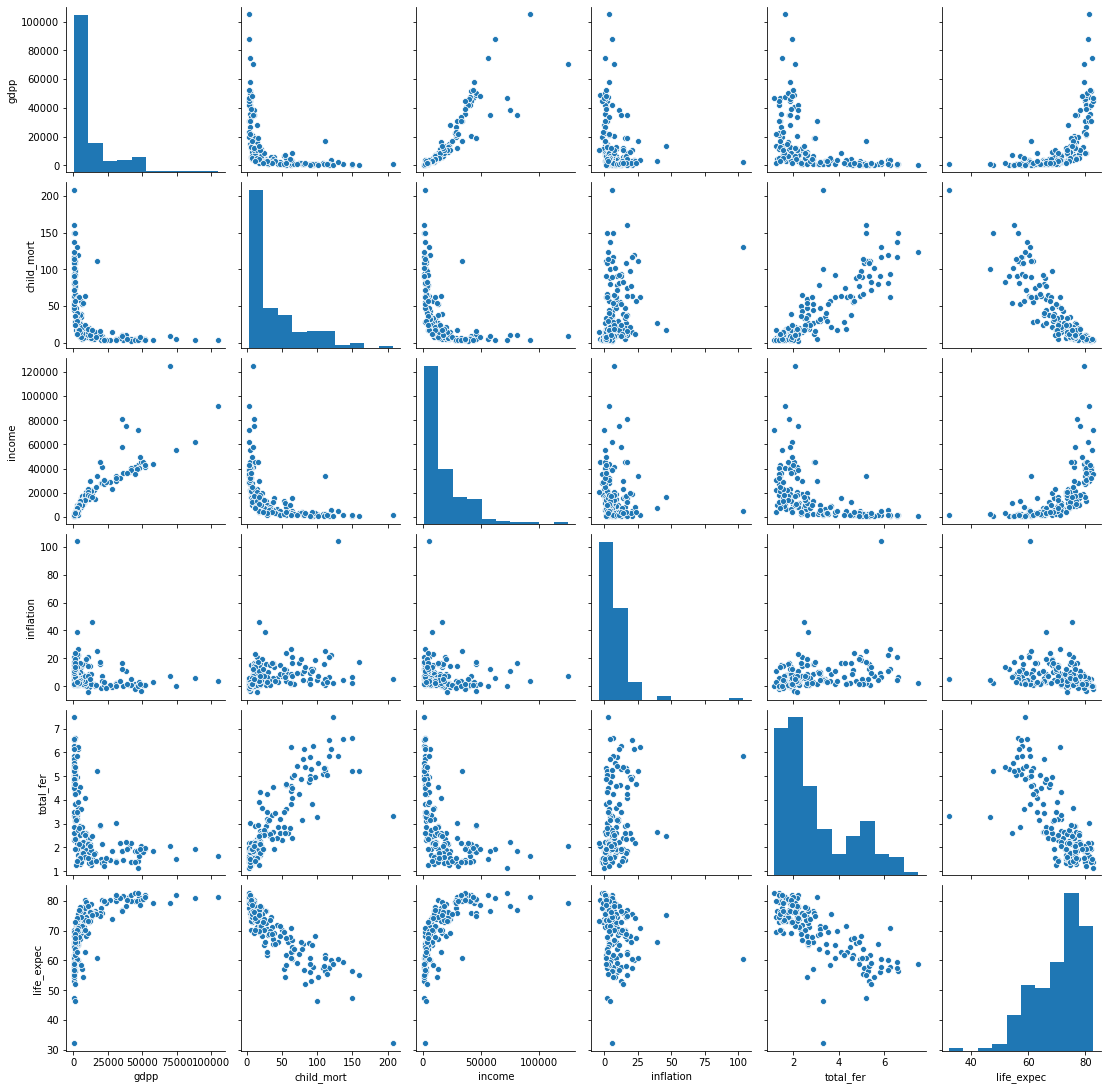

In [13]:
sns.pairplot(country[["gdpp","child_mort","income", "inflation", "total_fer", "life_expec"]])
plt.show()

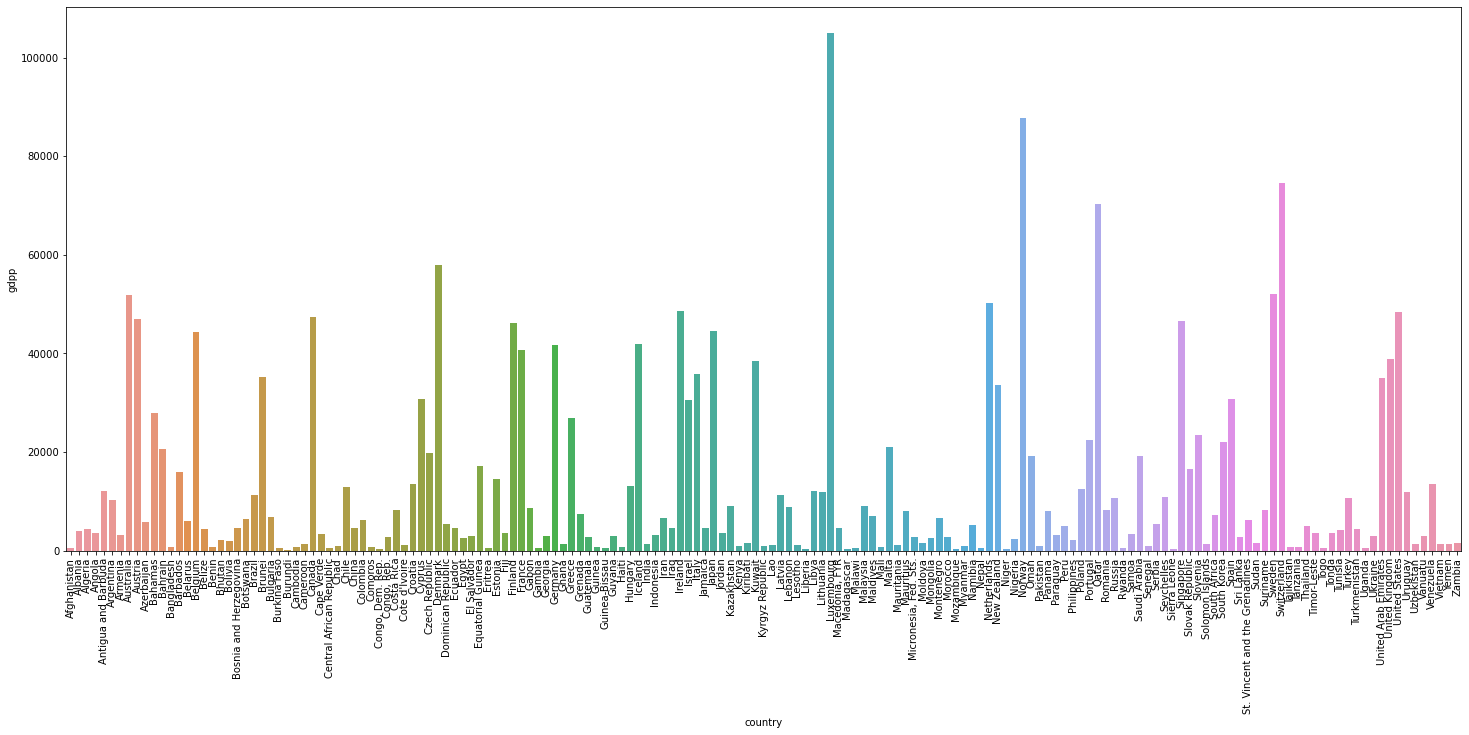

In [14]:
plt.figure(figsize=(25,10))
sns.barplot(data=country, x='country', y='gdpp')
plt.xticks(rotation=90)
plt.show()

*From the above bar plot we can find the countries which have high 'gdpp' values. Thus which are of lesser importance*

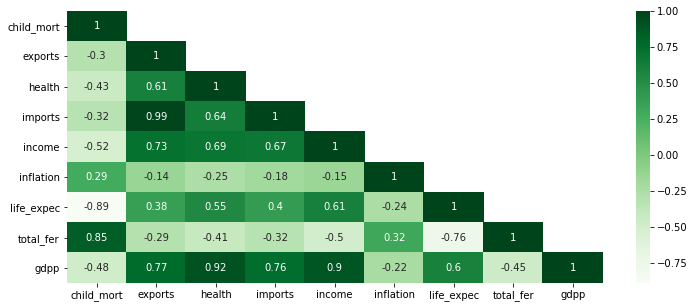

In [15]:
plt.figure(figsize=(12,5))
mask = np.array(country[count_num].corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(country[count_num].corr(), mask = mask, annot=True, cmap='Greens')
plt.show()

1.'gdpp' with other columns 'exports', 'health', 'imports' and 'income' have high correlation with each other<br>
2.'child_mort' has high correlation with 'total_fer' 

### Outliers

In [16]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [17]:
#checking the hard capped values 
country.quantile(0.95)

child_mort      116.000
exports       31385.100
health         4966.701
imports       24241.560
income        48290.000
inflation        20.870
life_expec       81.400
total_fer         5.861
gdpp          48610.000
Name: 0.95, dtype: float64

**Here we have removed the countries having high 'gdpp' values, Since low values of gdpp represents the backward countries,
high values are not needed. As gdpp have correlation with other columns, we have treated outlier for only one column**

In [18]:
Q = country['gdpp'].quantile(0.95)

In [19]:
# Since highest gdpp values are the countries developed it is better to filter them out
grouped_df = country[country['gdpp']<=Q]

In [20]:
grouped_df.shape

(158, 10)

*The list of the countries given in the dataset has been reduced to 158*

### Hopkins test

*This is the test done to validate clustering*

In [21]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(grouped_df.drop(columns='country'))

0.9477807166800426

*Since the hopkins test shows the percentage of clustering tendency of 97.5%, we can continue further process for modelling*

### Scaling

*Scaling done to avoid any inconsistency in cluster modelling*

In [23]:
# We have considered these three variables [gdpp, child_mort and income] for m=odelling
grouped_df = grouped_df[['country', 'gdpp', 'child_mort', 'income']]

In [24]:
#importing scaling libraries
import sklearn
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
grouped_df_scaled = scaler.fit_transform(grouped_df.drop(columns='country'))

In [26]:
grouped_df_scaled = pd.DataFrame(grouped_df_scaled)

In [27]:
grouped_df_scaled.columns = ['gdpp', 'child_mort', 'income']

In [28]:
grouped_df_scaled

,gdpp,child_mort,income
0,-0.738376,1.234847,-0.856955
1,-0.459367,-0.582710,-0.308713
2,-0.430180,-0.318473,-0.113006
3,-0.503541,1.946065,-0.574267
4,0.180376,-0.738289,0.295540
...,...,...,...
153,-0.547716,-0.271552,-0.768656
154,0.282924,-0.570362,0.124214
155,-0.678662,-0.417253,-0.667179
156,-0.678662,0.397684,-0.667838


### Modelling

In [29]:
from sklearn.cluster import KMeans

In [30]:
#Lets choose k = 4
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
kmeans.fit(grouped_df_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [31]:
kmeans.labels_

array([2, 3, 3, 2, 0, 0, 3, 1, 3, 0, 1, 3, 0, 0, 1, 3, 2, 3, 3, 3, 3, 0,
       1, 0, 2, 2, 3, 2, 1, 3, 2, 2, 0, 3, 3, 2, 2, 3, 0, 2, 0, 1, 0, 3,
       3, 3, 3, 2, 3, 0, 3, 1, 1, 3, 2, 3, 1, 2, 1, 3, 3, 2, 2, 3, 2, 0,
       1, 3, 3, 0, 3, 1, 1, 3, 1, 3, 0, 3, 3, 1, 3, 2, 0, 0, 2, 2, 0, 0,
       3, 3, 2, 0, 3, 2, 0, 2, 0, 3, 3, 3, 0, 3, 2, 3, 3, 3, 1, 2, 2, 1,
       2, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 1, 3, 0, 0, 2, 1, 0, 0, 3, 3, 0,
       1, 3, 3, 2, 0, 3, 2, 3, 3, 2, 3, 3, 0, 3, 2, 3, 1, 1, 1, 0, 3, 3,
       0, 3, 3, 2])

In [32]:
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,country,gdpp,child_mort,income,cluster_id
0,Afghanistan,553,90.2,1610,2
1,Albania,4090,16.6,9930,3
2,Algeria,4460,27.3,12900,3
3,Angola,3530,119.0,5900,2
4,Antigua and Barbuda,12200,10.3,19100,0


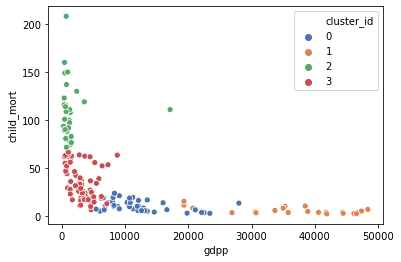

In [33]:
sns.scatterplot(data=grouped_df, x='gdpp', y='child_mort', hue='cluster_id', palette='deep')
plt.show()

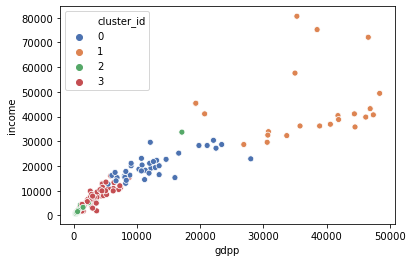

In [34]:
sns.scatterplot(data=grouped_df, x='gdpp', y='income', hue='cluster_id', palette='deep')
plt.show()

*From the above model we do not know whether chosen K value is gives optimum or not. Hence we do tests for choosing
optimum value of K*

### SSD

*For K-Means Clustering we have to decide the value of K, Hence we do two test such as Elbow curve and Silhouette score*

In [35]:
#importing necessary libraries
from sklearn.metrics import silhouette_score

#### Elbow curve

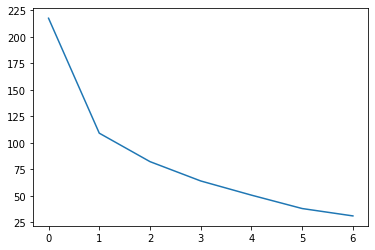

In [36]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(grouped_df_scaled[['gdpp', 'child_mort', 'income']])
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### Silhouette

In [37]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(grouped_df_scaled[['gdpp', 'child_mort', 'income']])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(grouped_df_scaled[['gdpp', 'child_mort', 'income']], cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5779643249650761
For n_clusters=3, the silhouette score is 0.5317028614846651
For n_clusters=4, the silhouette score is 0.4498424229841292
For n_clusters=5, the silhouette score is 0.4323461091765251
For n_clusters=6, the silhouette score is 0.45191313475862277
For n_clusters=7, the silhouette score is 0.46222361347579544
For n_clusters=8, the silhouette score is 0.4636382511487842


*Frome the above two tests we have decided to use the value of K=3*

In [38]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=100)
kmeans.fit(grouped_df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [39]:
kmeans.cluster_centers_

array([[-0.28834605, -0.44730336, -0.17949603],
       [ 1.88670051, -0.84439213,  1.71499765],
       [-0.66916505,  1.33942501, -0.75732091]])

In [40]:
#To see the cluster labels 
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 2])

In [41]:
#creating cluster_id column to add kmeans,labels_
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,country,gdpp,child_mort,income,cluster_id
0,Afghanistan,553,90.2,1610,2
1,Albania,4090,16.6,9930,0
2,Algeria,4460,27.3,12900,0
3,Angola,3530,119.0,5900,2
4,Antigua and Barbuda,12200,10.3,19100,0


In [42]:
#To see the number of datapoints in three clusters
grouped_df.cluster_id.value_counts()

0    83
2    46
1    29
Name: cluster_id, dtype: int64

**Now we should do visualization process to see the distribution datapoints in three clusters**

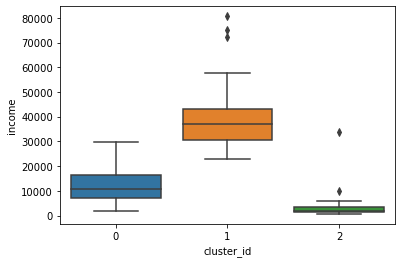

In [43]:
sns.boxplot(x='cluster_id', y='income', data=grouped_df)

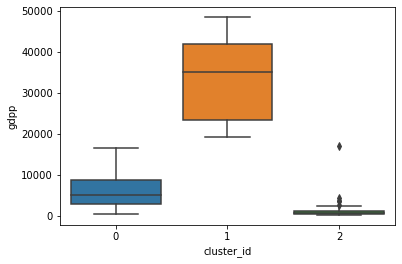

In [44]:
sns.boxplot(x='cluster_id', y='gdpp', data=grouped_df)

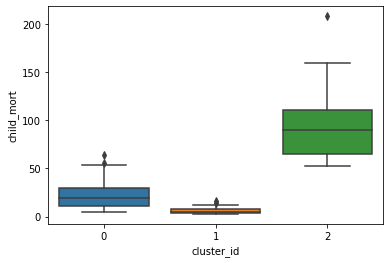

In [45]:
sns.boxplot(x='cluster_id', y='child_mort', data=grouped_df)

*From the above three boxplots for different variables we saw below results*<br>
1. For cluster_id = 0, contains countries of average gdpp values
2. For cluster_id = 1, contains countries of high gdpp values
3. For cluster_id =  2, contaons countries of low gdpp values

**Hence our interest of finding the countries which are in direst need of aid are present in cluster_id = 2**

### Scatter Plot

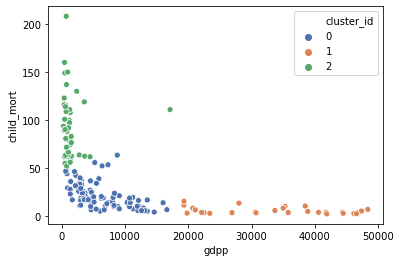

In [46]:
sns.scatterplot(data=grouped_df, x='gdpp', y='child_mort', hue='cluster_id', palette='deep')
plt.show()

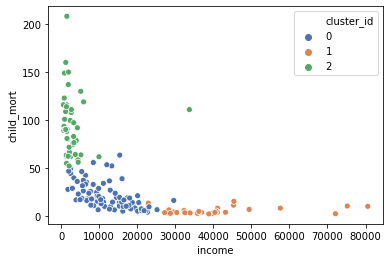

In [47]:
sns.scatterplot(data=grouped_df, x='income', y='child_mort', hue='cluster_id', palette='deep')
plt.show()

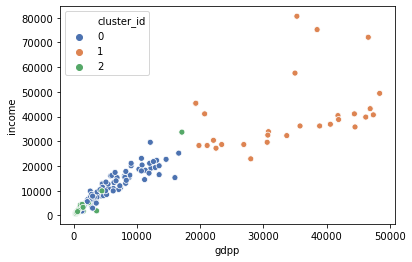

In [48]:
sns.scatterplot(data=grouped_df, x='gdpp', y='income', hue='cluster_id', palette='deep')
plt.show()

**Again from the above scatter plot we came to know that cluster_id = 2 contains the countries which require direst need of aid **

### Bar Plot

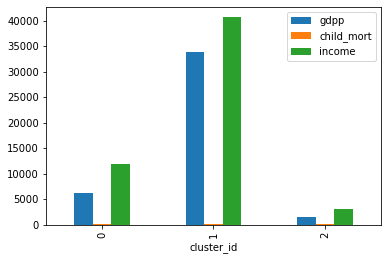

In [49]:
grouped_df.groupby(by='cluster_id').mean().plot.bar()
plt.show()

In [50]:
## Thus selecting the backward countries
aided_countries = grouped_df[grouped_df['cluster_id']==2]

In [51]:
#reporting top 5 countries based on priority wise
aided_countries.sort_values(by=['gdpp','child_mort','income'], ascending=[True, False, True]).head(10)

,country,gdpp,child_mort,income,cluster_id
26,Burundi,231,93.6,764,2
88,Liberia,327,89.3,700,2
37,"Congo, Dem. Rep.",334,116.0,609,2
112,Niger,348,123.0,814,2
132,Sierra Leone,399,160.0,1220,2
93,Madagascar,413,62.2,1390,2
106,Mozambique,419,101.0,918,2
31,Central African Republic,446,149.0,888,2
94,Malawi,459,90.5,1030,2
50,Eritrea,482,55.2,1420,2


**Hence the top 5 countries which require urgent aid are:**
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone

## Hierarchical Clustering

In [52]:
#importing necessary libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

**Here we perform two type linkages**

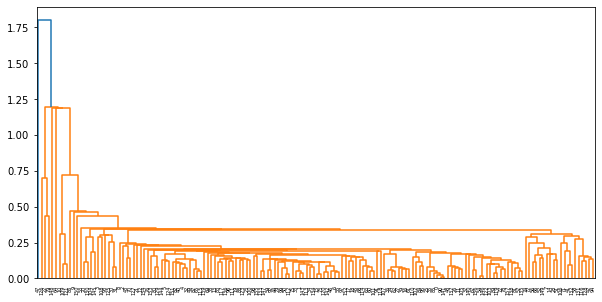

In [53]:
# single linkage
plt.figure(figsize=(10,5))
mergings = linkage(grouped_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

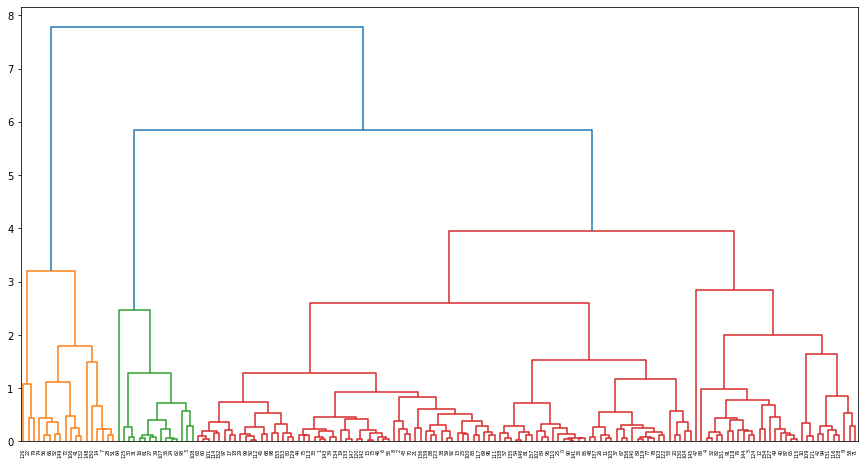

In [54]:
# complete linkage
plt.figure(figsize=(15,8))
mergings = linkage(grouped_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

*Since Complete linkage provide visual clarity compared to single linkage, we select the value of K=3 from it*

In [55]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0])

In [56]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,country,gdpp,child_mort,income,cluster_id,cluster_labels
0,Afghanistan,553,90.2,1610,2,0
1,Albania,4090,16.6,9930,0,0
2,Algeria,4460,27.3,12900,0,0
3,Angola,3530,119.0,5900,2,1
4,Antigua and Barbuda,12200,10.3,19100,0,0


In [57]:
#checking the distribution ofdatapoints across three clusters 
grouped_df.cluster_labels.value_counts()

0    125
2     18
1     15
Name: cluster_labels, dtype: int64

### Box Plot

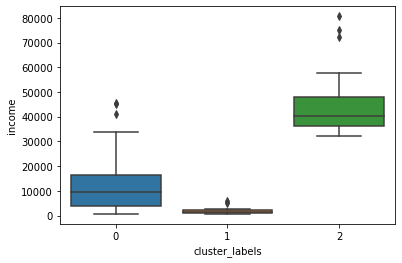

In [58]:
sns.boxplot(x='cluster_labels', y='income', data=grouped_df)
plt.show()

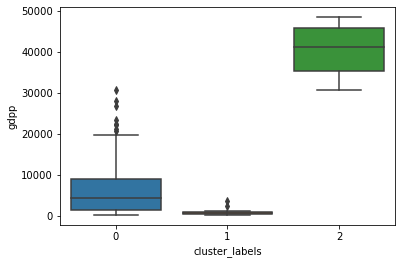

In [59]:
sns.boxplot(x='cluster_labels', y='gdpp', data=grouped_df)
plt.show()

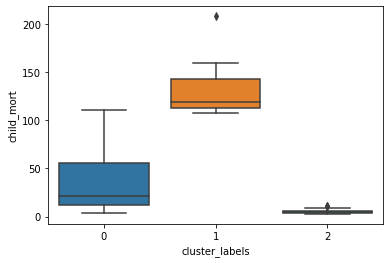

In [60]:
sns.boxplot(x='cluster_labels', y='child_mort', data=grouped_df)
plt.show()

### Bar Plot

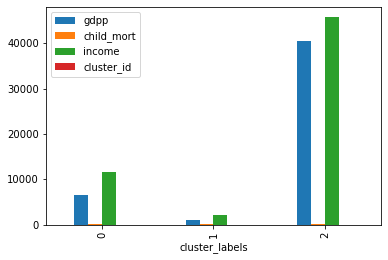

In [61]:
grouped_df.groupby('cluster_labels').mean().plot.bar()
plt.show()

**From the above visualization we found that**
1. For cluster_labels = 0, contains countries of average gdpp values
2. For cluster_labels = 1, contains countries of low gdpp values
3. For cluster_labels = 2, contaons countries of high gdpp values

In [62]:
#Choosing the countries which require direst need of aid  
aid_countries = grouped_df[grouped_df['cluster_labels']==1]

In [63]:
#Checking the Top countries which require aid
aid_countries.sort_values(by=['gdpp','child_mort','income'],ascending=[True, False, True])

,country,gdpp,child_mort,income,cluster_id,cluster_labels
37,"Congo, Dem. Rep.",334,116.0,609,2,1
112,Niger,348,123.0,814,2,1
132,Sierra Leone,399,160.0,1220,2,1
31,Central African Republic,446,149.0,888,2,1
64,Guinea-Bissau,547,114.0,1390,2,1
25,Burkina Faso,575,116.0,1430,2,1
63,Guinea,648,109.0,1190,2,1
66,Haiti,662,208.0,1500,2,1
97,Mali,708,137.0,1870,2,1
17,Benin,758,111.0,1820,2,1


**Hence the top 5 countries which require urgent aid are:**
1. Congo, Dem. Rep.
2. Niger
3. Sierra Leone
4. Central African Republic
5. Guinea-Bissau

## We choose the results from K-Means Clustering Algorithm